![](https://www.jainuniversity.ac.in/uploads/blog/db2b1c69fc63b1eb89a6ad774b1b8cb0.jpg)

Hello!!!. We will try to find out insights from the data and figure out which factors are resposnsible for a student to get placed. We will find out answers of many questions:-
*  If Gender has any affect on getting placed?
*  Stream in which students are getting highly placed and the stream in which students are least placed?
*  If marks really matter?
*  Degree and specialisation from which students are getting placed

And we will fit a few classification models to predict whether a student will get placed or not.

# Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [32]:
df=pd.read_csv('C:\\Users\\bkbha\\Downloads\\zero-to-pandas-course-project-v-6\\Placement_Data_Full_Class.csv')

In [33]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [34]:
df.drop(['sl_no'],axis=1,inplace=True)

In [35]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


Let's change the value of placed and Not place to Binary values for ease in use.

In [36]:
df['status'].values[df['status']=='Not Placed'] = 0 
df['status'].values[df['status']=='Placed'] = 1
df.status = df.status.astype('int')

In [37]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


   #  Drawing insights

<AxesSubplot:>

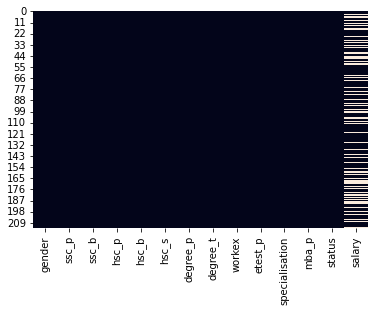

In [38]:
sns.heatmap(df.isnull(), cbar=False) #finding columns having nan values

We can see there are Nan values in the salary column. Replace them with 0.

In [39]:
df['salary'] = df['salary'].replace(np.nan, 0) #Replace Nan with 0

In [40]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.688372,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.464240,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,940000.000000


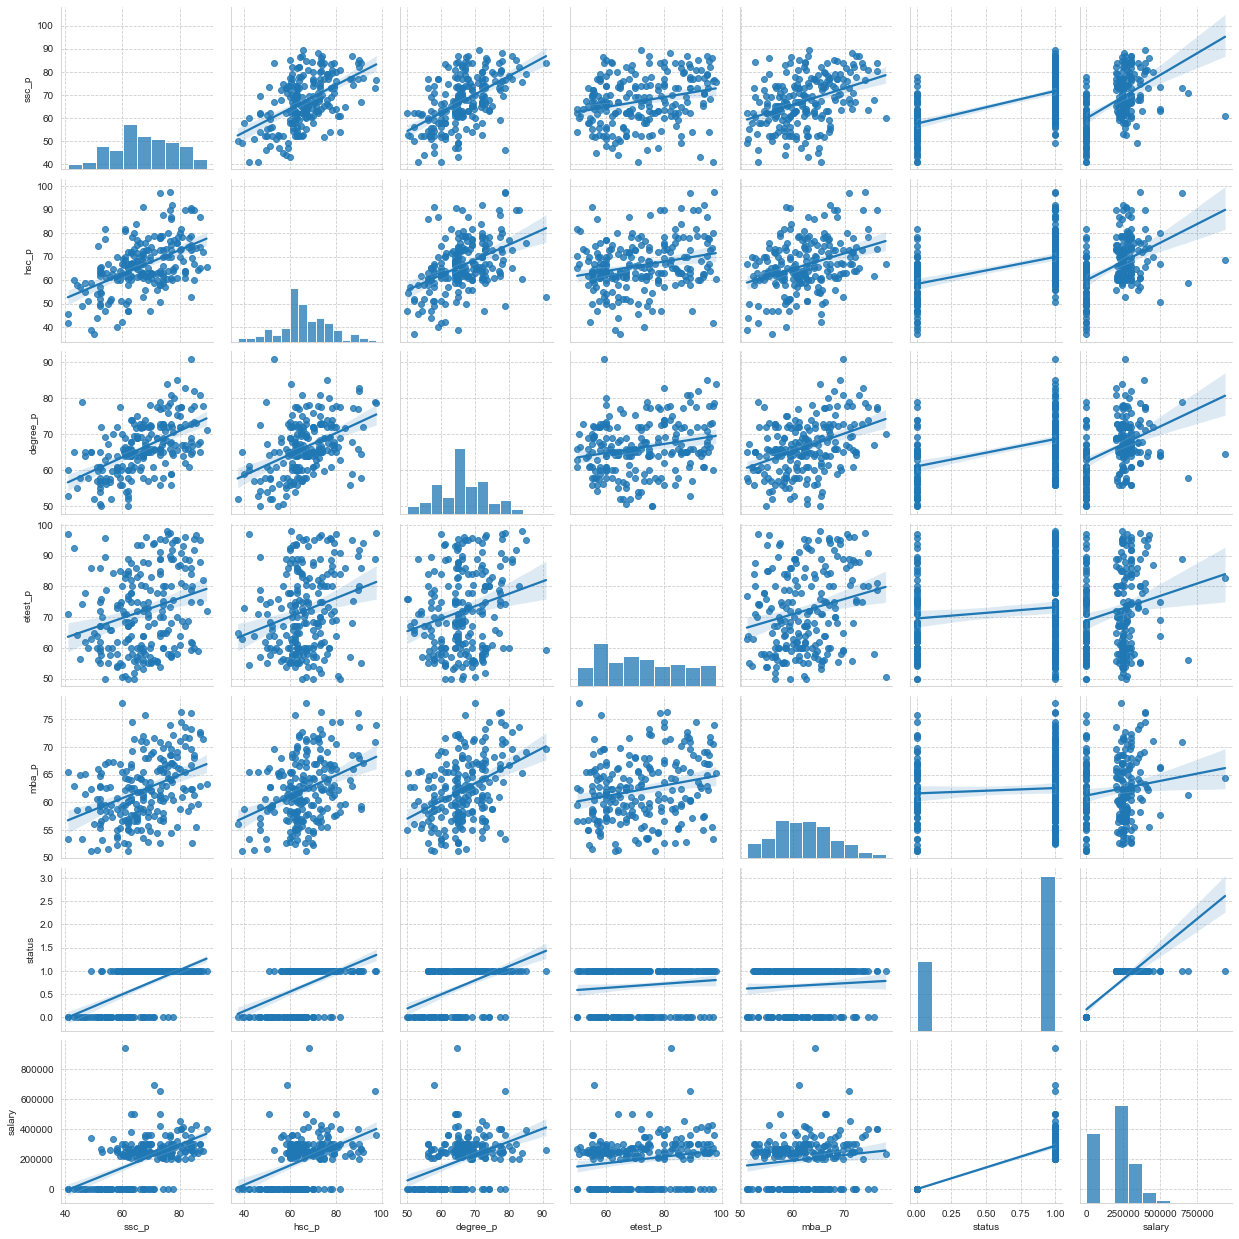

In [41]:
sns.set_style(style='whitegrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.pairplot(df,kind='reg')
plt.show()

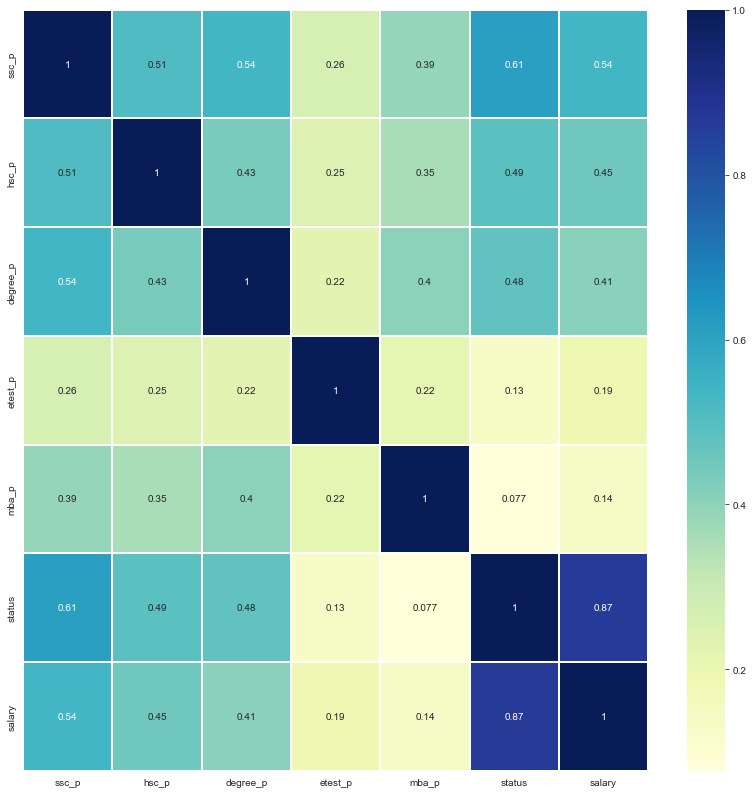

In [42]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), linewidth=0.2, cmap="YlGnBu", annot=True)
plt.show()

Surprisingly MBA percenrage and E-test precentage are the least significant variable that affect the placement outcome.

Lets explore more!!

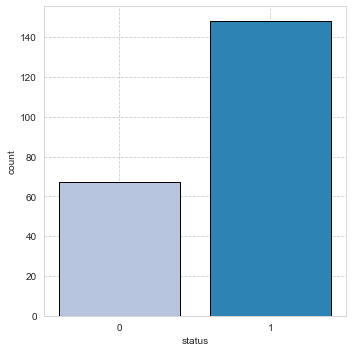

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(df['status'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

The number of students who got placed are twice that of students who are not placed.

## Significance of Gender

Lets See if Gender has any significance or not.

In [44]:
pd.DataFrame(df.groupby(['gender','status'])['status'].count())

status
gender status        
F      0           28
       1           48
M      0           39
       1          100

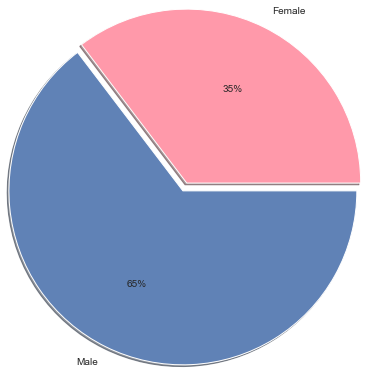

In [45]:
out_df=pd.DataFrame(df.groupby('gender')['gender'].count())
colors = ['#ff99aa','#6082B6']
plt.pie(out_df['gender'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

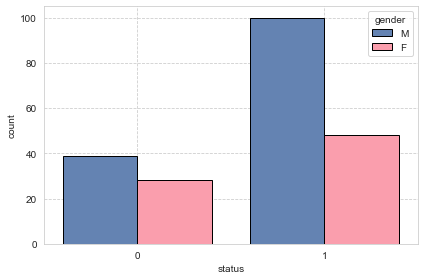

In [46]:
sns.countplot(df['status'],hue=df['gender'],palette= ['#6082B6','#ff99aa'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [47]:
Boys_placed=100
Total_Boys=139
Boys_placed_prop=Boys_placed/Total_Boys


Girls_placed=48
Total_Girls=68
Girls_placed_prop=Girls_placed/Total_Girls

print('Proportion of boys got placed: ') , 
print(Boys_placed_prop)

print('\nProportion of girls got placed: ') , 
print(Girls_placed_prop)


Proportion of boys got placed: 
0.7194244604316546

Proportion of girls got placed: 
0.7058823529411765


1. From the above plots we see that Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50 i.e., 2:1 ratio.
2. Total number girls not placed are 30 and Total number of boys not placed are 40.the boys to girls ratio who didnt get placed is 40:30 i.e., 4:3 ratio
3. But proportion of getting placed is same for both, i.e 71% . Therefore **Gender Has No role** in getting placed. 


## Significance of Marks

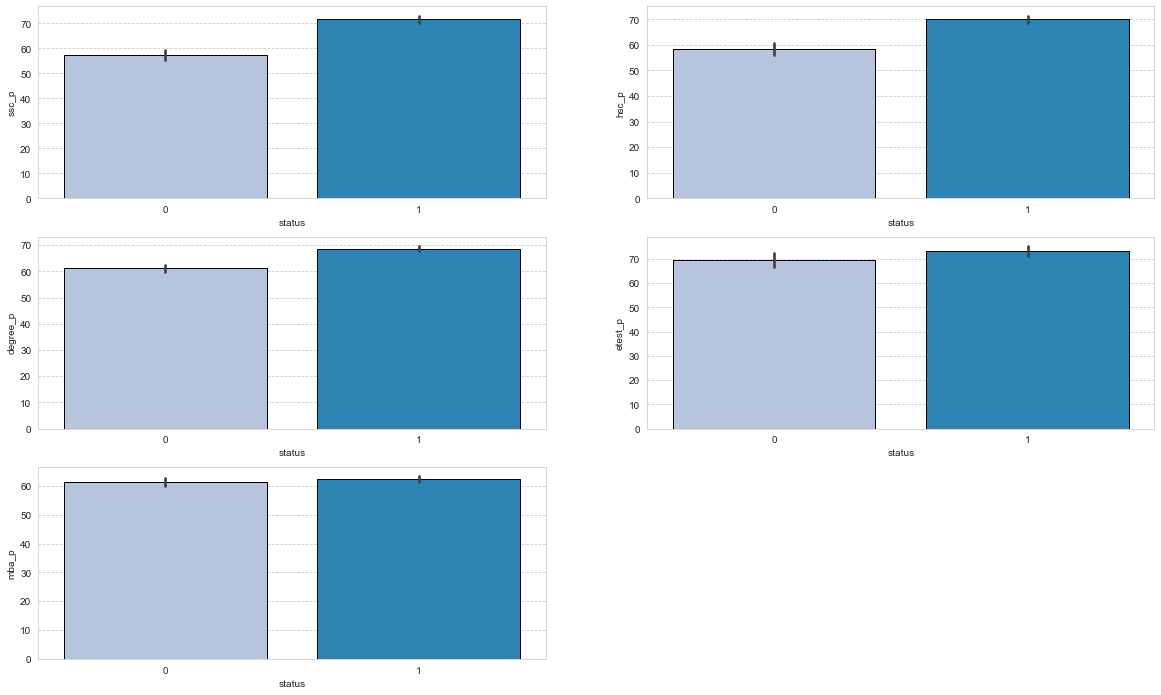

In [48]:
fig,axes = plt.subplots(3,2, figsize=(20,12))
sns.barplot(x='status', y='ssc_p', data=df, ax=axes[0][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='hsc_p', data=df, ax=axes[0][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='degree_p',data=df, ax=axes[1][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='etest_p',data=df, ax=axes[1][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='mba_p', data=df, ax=axes[2][0],palette='PuBu',saturation=0.9,edgecolor="black")
fig.delaxes(ax = axes[2][1]) 

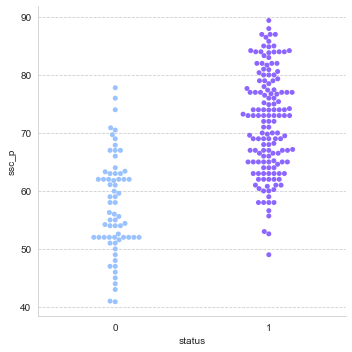

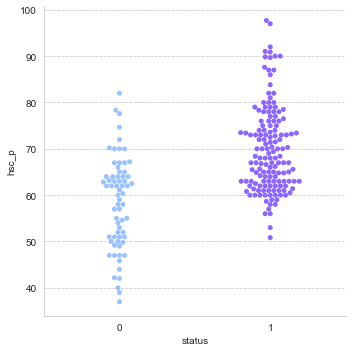

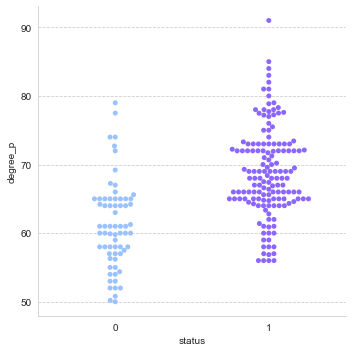

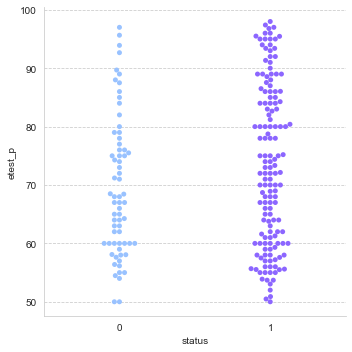

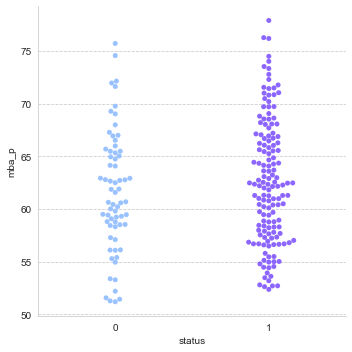

In [49]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="degree_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="etest_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="mba_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
plt.show()

1. Percentage matter for placement as we have seen from the HeatMap in previous section. So, yes The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed.
2. Higher Percentage necessarily doesn't guarantee a Placement.
3. etest and MBA percentage doesn't matter.


## Significance of work experience

In [50]:
pd.DataFrame(df.groupby(['workex','status'])['status'].count())

status
workex status        
No     0           57
       1           84
Yes    0           10
       1           64

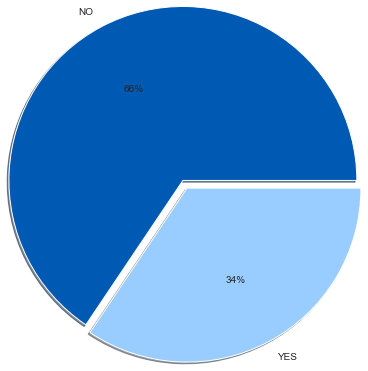

In [55]:
#to see the composition of work experience
out_df=pd.DataFrame(df.groupby('workex')['workex'].count())
colors = ['#0059b3','#99ccff']
plt.pie(out_df['workex'],labels=['NO','YES'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

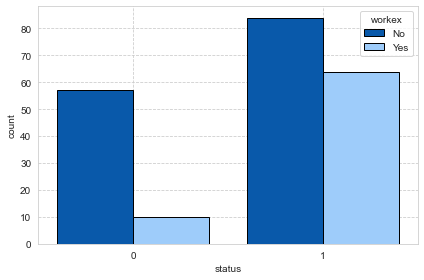

In [56]:
sns.countplot(df['status'],hue=df['workex'],palette= ['#0059b3','#99ccff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [57]:
Y_placed=64
Total_Y=74
Y_placed_prop=Y_placed/Total_Y


N_placed=84
Total_N=141
N_placed_prop=N_placed/Total_N

print('Proportion of student with work experience got placed: ') , 
print(Y_placed_prop)

print('\nProportion of students with No work experience got placed: ') , 
print(N_placed_prop)


Proportion of student with work experience got placed: 
0.8648648648648649

Proportion of students with No work experience got placed: 
0.5957446808510638


From above we can infere that:- 
 * Students who have work experience to get placed is more likely (86%).
 * 59% of students having no work experience got selected.  

**Therefore having work experience will help you for getting placed**

## Signifiance of Specialization

In [58]:
pd.DataFrame(df.groupby(['specialisation','status'])['status'].count())

status
specialisation status        
Mkt&Fin        0           25
               1           95
Mkt&HR         0           42
               1           53

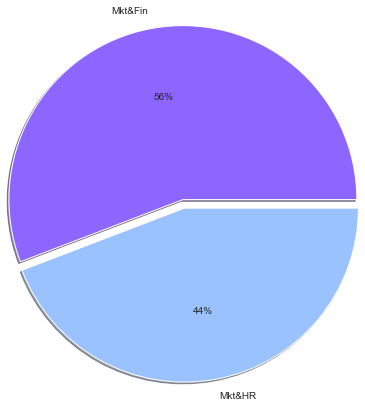

In [59]:
#to see the composition of Specialisation
out_df=pd.DataFrame(df.groupby('specialisation')['specialisation'].count())
colors = ['#8c66ff','#99c2ff']
plt.pie(out_df['specialisation'],labels=['Mkt&Fin','Mkt&HR'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

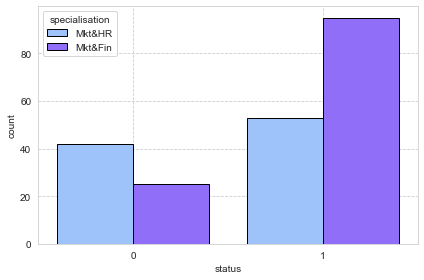

In [60]:
sns.countplot(df['status'],hue=df['specialisation'],palette= ['#99c2ff','#8c66ff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [61]:
MH_placed=53
Total_MH=95
MH_placed_prop=MH_placed/Total_MH


MF_placed=95
Total_MF=120
MF_placed_prop=MF_placed/Total_MF

print('Proportion of student from Market and HR got placed: ') , 
print(MH_placed_prop)

print('\nProportion of students from Market and finance got placed: ') , 
print(MF_placed_prop)


Proportion of student from Market and HR got placed: 
0.5578947368421052

Proportion of students from Market and finance got placed: 
0.7916666666666666


From above plots and calculation 
* Marketing and Finance Specialization is Most Demanded by Corporate.


## Does school Board really matters?

**SSC board**

In [62]:
pd.DataFrame(df.groupby(['ssc_b','status'])['status'].count())

status
ssc_b   status        
Central 0           38
        1           78
Others  0           29
        1           70

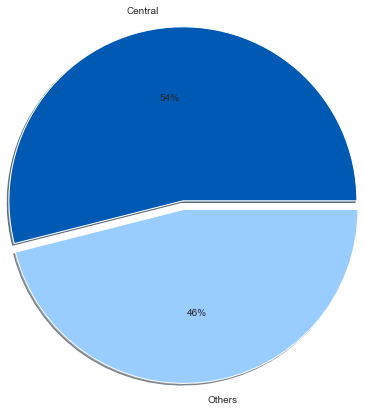

In [63]:
#to see the composition of ssc_b
out_df=pd.DataFrame(df.groupby('ssc_b')['ssc_b'].count())
colors = ['#0059b3','#99ccff']
plt.pie(out_df['ssc_b'],labels=['Central','Others'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

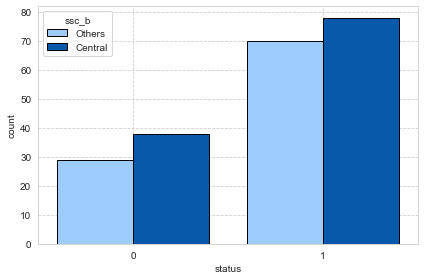

In [64]:
sns.countplot(df['status'],hue=df['ssc_b'],palette= ['#99ccff','#0059b3'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [65]:
print('Proportion of student having central board in SSC got placed: ') , 
print(78/(78+38))

print('\nProportion of students having other board in SSC got placed: ') , 
print(70/(70+29))


Proportion of student having central board in SSC got placed: 
0.6724137931034483

Proportion of students having other board in SSC got placed: 
0.7070707070707071


**HSC board**

In [66]:
pd.DataFrame(df.groupby(['hsc_b','status'])['status'].count())

status
hsc_b   status        
Central 0           27
        1           57
Others  0           40
        1           91

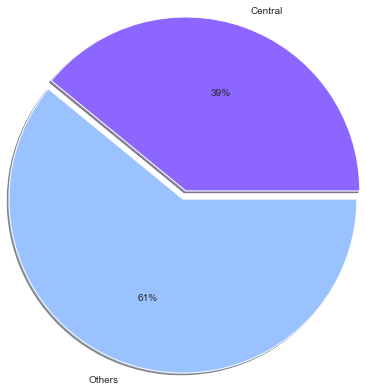

In [67]:
#to see the composition of hsc_b
out_df=pd.DataFrame(df.groupby('hsc_b')['hsc_b'].count())
colors = ['#8c66ff','#99c2ff']
plt.pie(out_df['hsc_b'],labels=['Central','Others'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

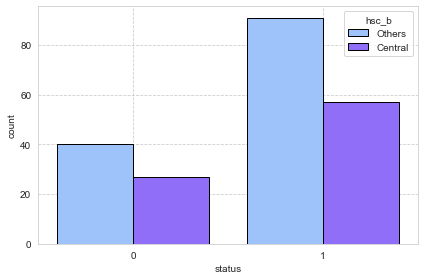

In [68]:
sns.countplot(df['status'],hue=df['hsc_b'],palette= ['#99c2ff','#8c66ff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [69]:
print('Proportion of student having central board in HSC got placed: ') , 
print(57/(57+27))

print('\nProportion of students having other board in HSC got placed: ') , 
print(91/(91+40))


Proportion of student having central board in HSC got placed: 
0.6785714285714286

Proportion of students having other board in HSC got placed: 
0.6946564885496184


We got the following insights from the above graphs and calculations:-
 




 **Percentage of students got placed from:**
* Central board in **SSC** : 67%
* Other board in **SSC** : 71%
* Central board in **HSC** : 67%
* Other board in **HSC** : 69%


We can see here that there is not significant difference between selecting board in SSC or HSC will help you getting placed. So it doesn't matter whether you you did your education form central board or other board.

## Does Stream of HSC matters?

In [70]:
pd.DataFrame(df.groupby(['hsc_s','status'])['status'].count())

status
hsc_s    status        
Arts     0            5
         1            6
Commerce 0           34
         1           79
Science  0           28
         1           63

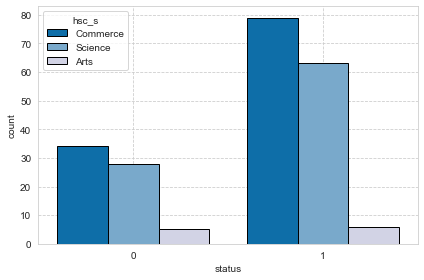

In [71]:
sns.countplot(df['status'],hue=df['hsc_s'],palette='PuBu_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [72]:
print('Proportion of commerce student got placed: ') , 
print(79/(79+34))

print('\nProportion of science students got placed: ') , 
print(63/(63+28))


Proportion of commerce student got placed: 
0.6991150442477876

Proportion of science students got placed: 
0.6923076923076923


Its better to opt for Commerce or Science,but commerce stream will be benefcial as it will help a student to build strong foundation in Business studies. Students from Arts are very few therefore we are ignoring that class. 

## Degree Type

In [73]:
pd.DataFrame(df.groupby(['degree_t','status'])['status'].count())

status
degree_t  status        
Comm&Mgmt 0           43
          1          102
Others    0            6
          1            5
Sci&Tech  0           18
          1           41

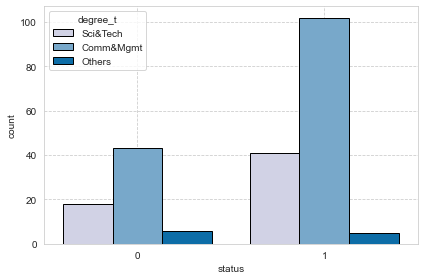

In [74]:
sns.countplot(df['status'],hue=df['degree_t'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [75]:
print('Proportion of Comm&Mgmt student got placed: ') , 
print(102/(43+102))

print('\nProportion of Sci&Tech students got placed: ') , 
print(41/(41+18))


Proportion of Comm&Mgmt student got placed: 
0.7034482758620689

Proportion of Sci&Tech students got placed: 
0.6949152542372882


Same as that of HSC stream.
Its better to opt for Comm&Mgmt or Sci&Tech,but comm&Mgmt stream will be benefcial. Students from others are very few therefore we are ignoring that class.

# So, who are the students who are more likely to get placed?

* Class 10 and class 12 percentage should be greater than 60% from any board
* You should have opted for commerce in HSC (science will also work)
* Degree from Commerce and managemnet will help you (Science and Tech will also work)
* Having work experience is like strawberry on cake. Students having work experience are more likley to get placed



# Data Preprocessing

**Coverting categorical columns to dummy variables**

In [107]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

**Selecting relevant columns which determines whether a student is placed or not**

In [108]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [109]:
df_x=df[[ 'ssc_p', 'hsc_p',  'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]

In [110]:
for i in df_x.columns:
    if df_x[i].dtype ==object:
        print(i)
        df_x =cat_to_num(df_x,i)

hsc_s
degree_t
workex
specialisation


In [111]:
df_x.drop(['workex','specialisation','hsc_s','degree_t'],inplace =True,axis =1)

In [112]:
y = df['status']
X = df_x

**Splitting into training set and test test**

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

# Model Fitting

In [114]:
scores = []

**Fitting logistic regression**

In [115]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,solver='liblinear',C=1.5)
model.fit(X_train, y_train)

LogisticRegression(C=1.5, random_state=42, solver='liblinear')

In [116]:
y_predict = model.predict(X_test)

scores.append({
        'model': 'LogisticRegression',
        'score': model.score(X_test,y_test)
    })

model.score(X_test,y_test)

0.9302325581395349

**Fitting Decision Tree**

In [117]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='random')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [118]:
pred=model.predict(X_test)

scores.append({
        'model': 'DecisionTreeClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.9069767441860465

**Fitting random forest**

In [119]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [120]:
y_predict = model.predict(X_test)

scores.append({
        'model': 'RandomForestClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.9767441860465116

In [121]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [122]:
pred=model.predict(X_test)

scores.append({
        'model': 'KNeighborsClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.8837209302325582

# Conclusion

In [123]:
Score = pd.DataFrame(scores,columns=['model','score'])
Score.sort_values('score',ascending=False,inplace=True)
Score

,model,score
2,RandomForestClassifier,0.976744
0,LogisticRegression,0.930233
1,DecisionTreeClassifier,0.906977
3,KNeighborsClassifier,0.883721


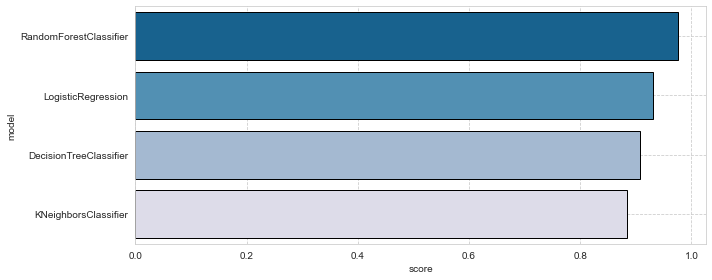

In [124]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['score'],palette='PuBu_r',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

**Random Forest is giving the best result here**

And we can use this Random Forest model to predict whether a student will get placed or not.

#  X      THE END      X